# **19-Fourier series**

---

### **Introduction**

In this notebook we introduce the Fourier series associated to a function.

---

### **Author**
**Junichi Koganemaru**  

---

### **Last Updated**
**April 10, 2025**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook we introduce the Fourier series associated to a function. The Fourier series, and more generally the Fourier transform, is a powerful mechanism for analyzing functions and have applications in many fields, including signal processing, image processing, and data compression. First we go over some linear algebraic concepts that are useful in understanding where the Fourier series comes from.

### Prerequisites from linear algebra

#### The Euclidean inner product 

For two vectors $\boldsymbol{v},\boldsymbol{w}$ in $\R^n$, the *inner product* between them is a scalar defined to be 
$$
\mathbb{R} \ni \boldsymbol{v} \cdot \boldsymbol{w} = \sum_{i=1}^n (\boldsymbol{v})_i (\boldsymbol{w})_i.
$$
In mathematics and physics, one often uses the notation 
$$
\langle \boldsymbol{v}, \boldsymbol{w} \rangle = \boldsymbol{v} \cdot \boldsymbol{w}
$$
to denote the inner product. The inner product can be thought of as a **bilinear map** $\langle \cdot, \cdot \rangle : \R^n \times \R^n \to \R$ that is linear in both arguments. 

From linear algebra, one learns that the geometry of $\mathbb{R}^n$ is essentially encoded in the inner product. Below we summarize some key facts.

1. The length or the norm of a vector is the square root of its inner product with itself: $\|\boldsymbol{v}\| = \sqrt{\boldsymbol{v} \cdot \boldsymbol{v} }$. 
2. The norm satisfies four main properties. 
    - Positivity: $\|\boldsymbol{v}\| \ge 0$ for all vectors $\boldsymbol{v}$. 
    - Positive-definiteness: $\|\boldsymbol{v}\| = 0$ if and only if $\boldsymbol{v} = 0$.
    - Homogeneity: $\|c\boldsymbol{v}\| = |c| \|\boldsymbol{v}\|$ for any scalar $c \in \mathbb{R}$. 
    - The triangle inequality: $\|\boldsymbol{v} + \boldsymbol{w}\| \le \|\boldsymbol{v}\| + \|\boldsymbol{w}\|$.
3. The angle $\theta \in [0,\pi]$ between two non-zero vectors $\boldsymbol{v},\boldsymbol{w}$ is determined by the equation $$\cos \theta = \frac{\boldsymbol{v}\cdot \boldsymbol{w}}{\|\boldsymbol{v}\| \|\boldsymbol{w}\|}.$$
4. Two vectors are orthogonal if and only if $\boldsymbol{v}\cdot \boldsymbol{w} = 0$.
5. The inner product between two vectors satisfies the Cauchy-Schwartz inequality:
   $$
   |\boldsymbol{v} \cdot \boldsymbol{w}| \le \|\boldsymbol{v}\| \|\boldsymbol{w}\|
   $$
   
#### Decomposition formula with respect to an orthonormal basis

A set of vectors $\{\boldsymbol{q}_1, \ldots , \boldsymbol{q}_n\} \subset \mathbb{R}^n$ is said to be an **orthonormal basis** for $\mathbb{R}^n$ if they are mutually orthogonal to each other and they all have length 1. In other words, 
$$
\boldsymbol{q}_i \cdot \boldsymbol{q}_j = 
\begin{cases}
1, & i = j \\
0, & i \neq j
\end{cases}, \quad 1 \leq i, j \leq n.
$$

A fundamental result from linear algebra is the following: $\boldsymbol{q}_1, \ldots, \boldsymbol{q}_n$ form an orthonormal basis for $\mathbb{R}^n$, then any vector $\boldsymbol{b} \in \mathbb{R}^n$ can be written as 
$$
\boldsymbol{b} = \text{proj}_{\boldsymbol{q}_1} \boldsymbol{b} + \ldots + \text{proj}_{\boldsymbol{q}_n} \boldsymbol{b} = (\boldsymbol{q}_1 \cdot \boldsymbol{b}) \boldsymbol{q}_1 + \ldots + (\boldsymbol{q}_n \cdot \boldsymbol{b}) \boldsymbol{q}_n.
$$
The geometric interpretation of $\text{proj}_{\boldsymbol{q}_j} \boldsymbol{b} = (\boldsymbol{q}_j \cdot \boldsymbol{b}) \boldsymbol{q}_j$ is that it is the projection of $\boldsymbol{b}$ onto the line spanned by $\boldsymbol{q}_j$. The decomposition formula is essentially saying that the original vector $\boldsymbol{b}$ can be *reconstructed* by adding up the projections of $\boldsymbol{b}$ onto the lines spanned by the orthonormal basis vectors.

This is essentially the idea behind the Fourier series: a function $f$ can be "reconstructed" by adding up the "projections" of $f$ onto the orthonormal basis functions, in a suitable sense. 

In order to make sense of this, we first need to specify what types of functions we are working with, and in what sense we are taking this projection. This leads the the notion of **square integrable functions** and the **$L^2$ inner product**.


### Square integrable functions and the inner product

For the sake of simplicity, we will assume for now that we are working with functions defined over the interval $[0,2 \pi]$. Later we will generalize this to other types of domains. We first define the space of square integrable functions over the interval $[0,2\pi]$ as follows.

> **Definition** Let $f:I \to \mathbb{R}$ be a function, where $I \subseteq [0,2\pi]$. We say that $f$ is **square-integrable** whenever the following Riemann integral is well-defined and finite:
> $$
> \int_0^{2\pi} |f(x)|^2 dx < \infty.
> $$

> **Example** Any continuous function over $[0,2\pi]$ is square integrable. 

> **Example** The function $f:(0,2\pi] \to \mathbb{R}$ defined by $f(x) = \frac{1}{x}$ is not square integrable. 

> **Example** Let $p \in \mathbb{R}$. The function $f:(0,2\pi] \to \mathbb{R}$ defined via $f(x) = \frac{1}{x^p}$ is square integrable iff. $2p < 1$ by the $p$-test. 

**Remark:** This definition is a somewhat simplified version of the standard definition of [square integrable functions](https://en.wikipedia.org/wiki/Square-integrable_function) in practice, partially because one typically uses the Lebesgue integral instead of the Riemann integral in practice. Developing the Lebesgue integral requires machinery outside the scope of this course. For practical applications, defining this in terms the Riemann integral is typically sufficient. 

Throughout this notebook will use the notation $L^2([0,2\pi];\R)$ to denote the set of square integrable functions, though one should keep in mind that technically this is different from the standard definition of $L^2([0,2\pi]; \mathbb{R})$ used in practice.

**Remark** The notation $L^2$ comes from the study of [$L^p$ spaces](https://en.wikipedia.org/wiki/Lp_space), which is a class of function spaces studied in functional analysis. The letter $L$ is typically attributed to Henri Lebesgue (1875-1941), who developed the theory of the Lebesgue integral in his PhD thesis in 1902. $L^2$ ends up being special as it is the only **Hilbert space** in the family of $L^p$ spaces, and is extensively used in applications. For example, $L^2$ ends up being the natural space to use for the axiomatic formulation of quantum mechanics.

#### The $L^2$ inner product

It turns out that we can define an inner product on $L^2([0,2\pi])$.

> **Definition (The $L^2$ inner product)** The inner product of two square integrable functions $f,g \in L^2([0,2\pi];\mathbb{R})$ is given by  
> $$  
> \langle f, g \rangle := \int_0^{2\pi} f(x) g(x) \; dx, \quad x \in [0, 2\pi].  
> $$  
> This is referred to as the *$L^2$-inner product*. The norm of a function $f \in $L^2([0,2\pi];\mathbb{R})$ is then given by  
> $$  
> \|f\|_{L^2} := \sqrt{\langle f, f \rangle} = \left( \int_0^{2\pi} |f(x)|^2 \; dx \right)^{\frac{1}{2}}, \quad x \in [0, 2\pi].  
> $$  

Once we fix an inner product, we can try to identify an orthonormal basis for $L^2$. It turns out that the functions 
$$
\frac{1}{\sqrt{2\pi}}, \frac{\cos(x)}{\sqrt{\pi}}, \frac{\sin(x)}{\sqrt{\pi}}, \frac{\cos(2x)}{\sqrt{\pi}}, \frac{\sin(2x)}{\sqrt{\pi}}, \ldots, \quad x \in [0, 2\pi]
$$
form a family of functions that are mutually orthogonal and have length 1, with respect to the $L^2$-inner product defined above.

**Remark:** The basis functions can be different depending on the choice of the inner product, and also the domain for which the functions are defined over.



Now we are ready to write down the Fourier series of a function in $L^2([0,2\pi])$. If we follow the decomposition formula in $\R^n$, the analogous decomposition formula in $L^2([0,2\pi]; \mathbb{R})$ should be given by
$$
f(x) = \left\langle f, 	\frac{1}{\sqrt{2\pi} } \right\rangle 	\frac{1}{\sqrt{2\pi} } + \left\langle f,  \frac{\cos(\cdot)}{\sqrt{\pi} }  \right\rangle  \frac{\cos(x)}{\sqrt{\pi} }  +  \left\langle f,  \frac{\sin(\cdot)}{\sqrt{\pi} }  \right\rangle  \frac{\sin(x)}{\sqrt{\pi} }  + \ldots, \quad x \in [0, 2\pi].
$$

The expression on the right-hand side is what we call the Fourier series of $f$. We note, however, that unlike the decomposition formula in $\mathbb{R}^n$, we have an infinite series on the right hand side. This means that we need to consider convergence properties of the series. This ends up being highly non-trivial, and is a major topic of study in what is known as *Fourier analysis*.

In fact, through examples that we will study below, in general the convergence is **not** pointwise, meaning that one can functions $f$ and values $x \in [0, 2\pi]$ for which
$$
f(x) \neq \lim_{N \to \infty} \left\langle f, 	\frac{1}{\sqrt{2\pi} } \right\rangle 	\frac{1}{\sqrt{2\pi} } + \left\langle f,  \frac{\cos(\cdot)}{\sqrt{\pi} }  \right\rangle  \frac{\cos(x)}{\sqrt{\pi} }  +  \left\langle f,  \frac{\sin(\cdot)}{\sqrt{\pi} }  \right\rangle  \frac{\sin(x)}{\sqrt{\pi} }  + \ldots + \left\langle f,  \frac{\cos(Nx)}{\sqrt{\pi} }  \right\rangle  \frac{\cos(Nx)}{\sqrt{\pi} }  +  \left\langle f,  \frac{\sin(Nx)}{\sqrt{\pi} }  \right\rangle  \frac{\sin(Nx)}{\sqrt{\pi} }
$$


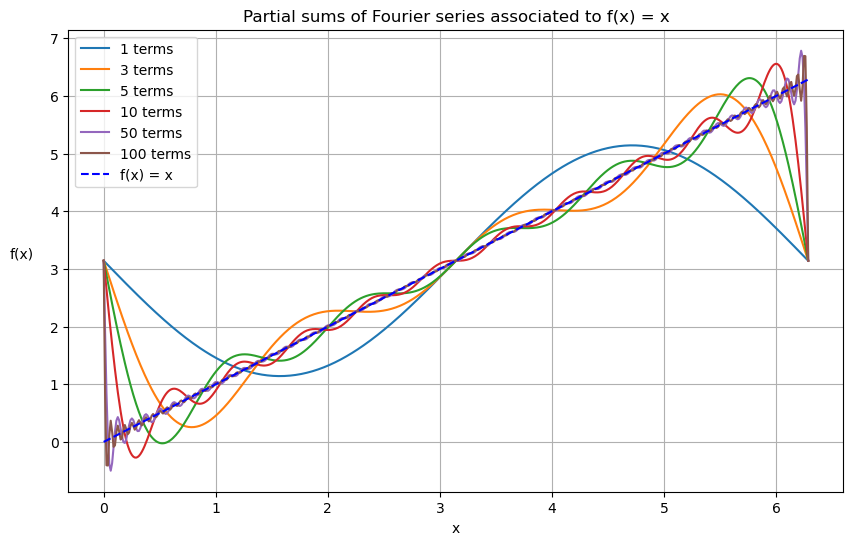

In [5]:
x = np.linspace(0, 2 * np.pi, 500)
f = x

def fourier_partial_sum(x, n_terms):
    partial_sum = np.pi  # a_0 / 2
    for k in range(1, n_terms + 1):
        b_k = -2 / k
        partial_sum += b_k * np.sin(k * x)
    return partial_sum

plt.figure(figsize=(10, 6))
n_terms_list = [1, 3, 5, 10, 50, 100]

for n_terms in n_terms_list:
    plt.plot(x, fourier_partial_sum(x, n_terms), label=f'{n_terms} terms')

plt.plot(x, f, 'b--', label='f(x) = x')
plt.xlabel('x')
plt.ylabel('f(x)', rotation=0, labelpad=20)
plt.title('Partial sums of Fourier series associated to f(x) = x')
plt.legend()
plt.grid()
plt.show()